In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras import layers,Sequential
from sklearn.model_selection import train_test_split
import seaborn as sns
import pathlib

In [3]:
tf.__version__

'2.8.0'

In [4]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True) 

In [5]:
# !wget -O dog_and_cat.zip https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

--2022-04-26 21:49:54--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 184.85.108.113, 2600:1417:76:68e::e59, 2600:1417:76:68a::e59
Connecting to download.microsoft.com (download.microsoft.com)|184.85.108.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘dog_and_cat.zip’

dog_and_cat.zip     100%[===================>] 786.68M   345MB/s    in 2.3s    

2022-04-26 21:49:56 (345 MB/s) - ‘dog_and_cat.zip’ saved [824894548/824894548]



In [6]:
# !unzip dog_and_cat.zipN

Archive:  dog_and_cat.zip
replace PetImages/Cat/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [7]:
path = pathlib.Path('/content/PetImages')

In [8]:
path

PosixPath('/content/PetImages')

In [9]:
path_list = list(path.glob(r'**/*.jpg'))

In [10]:
path_list[:5]

[PosixPath('/content/PetImages/Dog/3448.jpg'),
 PosixPath('/content/PetImages/Dog/150.jpg'),
 PosixPath('/content/PetImages/Dog/7717.jpg'),
 PosixPath('/content/PetImages/Dog/8332.jpg'),
 PosixPath('/content/PetImages/Dog/667.jpg')]

In [11]:
test = path_list[:100] + path_list[-100:]

In [12]:
dataset = []
label = []

In [13]:
for p in path_list:
    img = cv2.imread(str(p))
    try:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    except:
        continue
    img = cv2.resize(img, (128,128))
    img = img/255.0
    if "Cat" in str(p):
        dataset.append(img)
        label.append(0)
    else:
        dataset.append(img)
        label.append(1)

In [14]:
dataset = np.array(dataset)

In [15]:
print(dataset.shape)

(24946, 128, 128, 3)


In [16]:
X = dataset
y = label

In [17]:
print(y[-5:])
print(y[:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


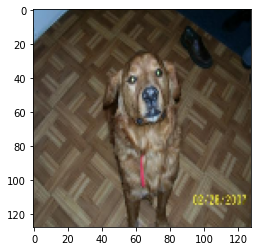

In [18]:
plt.imshow(X[0])
plt.show()

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [20]:
y_train = tf.one_hot(y_train, depth=2)
y_test = tf.one_hot(y_test, depth=2)

In [21]:
print(y_train[:5])

tf.Tensor(
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]], shape=(5, 2), dtype=float32)


In [23]:
model = Sequential()

model.add(layers.Flatten(input_shape=(128,128,3)))
# model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 256)               12583168  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 12,616,322
Trainable params: 12,616,322
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch_range = range(20)

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epoch_range, accuracy, label='Training Accuracy')
plt.plot(epoch_range, val_accuracy, label='Validation Accuracy')
plt.legend(bbox_to_anchor=(0.8,1.15), ncol=1)

plt.subplot(1,2,2)
plt.plot(epoch_range, loss, label='Training Loss')
plt.plot(epoch_range, val_loss, label='Validation Loss')
plt.legend(bbox_to_anchor=(0.8, 1.15), ncol=1)

plt.show()

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
y_hat = model.predict(x_test)

In [ ]:
print(y_test[0])
print(y_hat[0])

In [ ]:
labels = np.argmax(y_test, axis=1)
predictions = np.argmax(y_hat, axis=1)

In [ ]:
print(y_hat.shape)
print(predictions.shape)

In [ ]:
print(labels[:5])
print(predictions[:5])

In [ ]:
confusion_matrix = tf.math.confusion_matrix(labels, predictions)

In [ ]:
confusion_matrix

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='')
plt.xlabel('Prediction', color='r', fontsize=25)
plt.ylabel('Labels', color='r', fontsize=25)
plt.show()

In [ ]:
Label = []
for i in range(len(labels)):
    if labels[i] == 0:
        Label.append('Cat')
    else:
        Label.append('Dog')

In [ ]:
Prediction = []
for i in range(len(predictions)):
    if predictions[i] == 0:
        Prediction.append('Cat')
    else:
        Prediction.append('Dog')

In [ ]:
print(Label[:2])
print(Prediction[:2])

In [ ]:
plt.figure(figsize=(20,12))
n = 50
j=0
for i in range(n):
    if labels[i] != predictions[i]:
        img = x_test[i]
        plt.subplot(3,4,j+1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Labels = {Label[i]}\n Prediction = {Prediction[i]}', fontsize=10)
        plt.axis('off')
        j+=1
print(j)
plt.show()

In [ ]:
plt.figure(figsize=(20,12))
j=0
k=len(y_test)
for i in range(len(y_test)):
    if labels[i] != predictions[i]:
        j+=1
print('Number of Losses', j, 'out of',k )